# Import Important Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Hide the warnings
import warnings
warnings.filterwarnings('ignore')

# Load The Dataset

In [3]:
dataset=pd.read_csv('zomato.csv')
dataset.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
dataset.shape

(51717, 17)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

Dataset has 51717 rows and 16 columns.out of 16 columns only vote column has numerical value and other columns has object datatype.

# Data Preprocessing

1.MISSING VALUES

In [6]:
Nan_Dataset=[features for features in dataset.columns if dataset[features].isnull().sum() > 0]
Nan_Dataset

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

% Percentage of missing values in each columns

In [7]:
dataset.isnull().mean()*100

url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

Dish_liked columns has maximum missing value more than 50%

# remove columns And make new dataset 

In [8]:
Zomato_dataset=dataset.drop(['url','phone','address','dish_liked','reviews_list','menu_item','location'],axis=1)
Zomato_dataset.head()

,name,online_order,book_table,rate,votes,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


# Rename some column Names

In [9]:
Zomato_dataset.rename({'approx_cost(for two people)' :'approx_cost_for_2_People',
                       'listed_in(type)':'Resturant_type',
                       'listed_in(city)':'city'    },axis=1,inplace=True)

In [10]:
Zomato_dataset.head()

,name,online_order,book_table,rate,votes,rest_type,cuisines,approx_cost_for_2_People,Resturant_type,city
0,Jalsa,Yes,Yes,4.1/5,775,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


# find Unique values in each columns

In [11]:
Zomato_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   name                      51717 non-null  object
 1   online_order              51717 non-null  object
 2   book_table                51717 non-null  object
 3   rate                      43942 non-null  object
 4   votes                     51717 non-null  int64 
 5   rest_type                 51490 non-null  object
 6   cuisines                  51672 non-null  object
 7   approx_cost_for_2_People  51371 non-null  object
 8   Resturant_type            51717 non-null  object
 9   city                      51717 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


In [12]:
for features in ['online_order','book_table','rate','rest_type','Resturant_type','city']:
    print('{} column has unique values ={}'.format(features,set(Zomato_dataset[features].unique())))

online_order column has unique values ={'No', 'Yes'}
book_table column has unique values ={'No', 'Yes'}
rate column has unique values ={nan, '4.5 /5', '4.9 /5', '4.1/5', '2.3 /5', '2.1/5', '3.9/5', 'NEW', '-', '4.1 /5', '3.3/5', '2.8/5', '4.7/5', '2.9/5', '4.5/5', '3.5 /5', '3.6 /5', '4.2 /5', '2.0/5', '4.6 /5', '2.6 /5', '3.4/5', '2.7 /5', '4.0 /5', '2.2/5', '3.2 /5', '1.8/5', '2.1 /5', '2.5/5', '3.4 /5', '2.4/5', '4.8/5', '2.4 /5', '2.2 /5', '3.2/5', '3.6/5', '3.0/5', '2.3/5', '4.8 /5', '3.5/5', '2.9 /5', '4.7 /5', '1.8 /5', '4.2/5', '4.3/5', '2.6/5', '2.5 /5', '4.9/5', '4.4 /5', '3.7/5', '3.9 /5', '2.7/5', '2.0 /5', '3.8 /5', '4.3 /5', '4.4/5', '3.1/5', '3.7 /5', '3.1 /5', '3.3 /5', '3.0 /5', '3.8/5', '2.8 /5', '4.0/5', '4.6/5'}
rest_type column has unique values ={nan, 'Casual Dining, Sweet Shop', 'Bakery, Cafe', 'Dessert Parlor, Beverage Shop', 'Cafe, Quick Bites', 'Casual Dining, Pub', 'Sweet Shop', 'Pub, Microbrewery', 'Cafe, Lounge', 'Casual Dining', 'Cafe, Casual Dining', 'Cas

Rate Column has objective Datatype and it /5 in each value in some places it conteins '-',nan,NEW 

Remove /5 from Rate column

In [13]:
Zomato_dataset['rate']=Zomato_dataset['rate'].str.replace('/5','')

In [14]:
Zomato_dataset.head()

,name,online_order,book_table,rate,votes,rest_type,cuisines,approx_cost_for_2_People,Resturant_type,city
0,Jalsa,Yes,Yes,4.1,775,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


Fill all mising values in zomato rate column 

In [15]:
Zomato_dataset['rate']=Zomato_dataset['rate'].fillna('NEW')


In [16]:
Zomato_dataset['rate'].isnull().sum()

0

In [17]:
Zomato_dataset['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

Make a list of index number contain NEW or '-' in rate column

In [18]:
l=[]
for rate in range(len(Zomato_dataset)) :
    if Zomato_dataset.rate[rate] =='NEW' or Zomato_dataset.rate[rate]=='-':
         l.append(rate)
        

In [19]:
Zomato_dataset.shape

(51717, 10)

drop all the rows with the index of l

In [20]:
Zomato_dataset.drop(l,inplace=True)
Zomato_dataset.shape

(41665, 10)

In [21]:
Zomato_dataset['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', '2.9', '3.5', '2.6',
       '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '3.4 ', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '3.7 ',
       '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ', '3.2 ',
       '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8', '4.6 ',
       '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

Change the datatype of rate column from Object to numeric

In [22]:
Zomato_dataset['rate']=pd.to_numeric(Zomato_dataset['rate'])

In [23]:
Zomato_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41665 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      41665 non-null  object 
 1   online_order              41665 non-null  object 
 2   book_table                41665 non-null  object 
 3   rate                      41665 non-null  float64
 4   votes                     41665 non-null  int64  
 5   rest_type                 41516 non-null  object 
 6   cuisines                  41654 non-null  object 
 7   approx_cost_for_2_People  41418 non-null  object 
 8   Resturant_type            41665 non-null  object 
 9   city                      41665 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.5+ MB


In [24]:
Zomato_dataset.isnull().mean()*100

name                        0.000000
online_order                0.000000
book_table                  0.000000
rate                        0.000000
votes                       0.000000
rest_type                   0.357614
cuisines                    0.026401
approx_cost_for_2_People    0.592824
Resturant_type              0.000000
city                        0.000000
dtype: float64

Remove ',' from approx_cost_for_2_People columns

In [25]:
Zomato_dataset['approx_cost_for_2_People']=Zomato_dataset['approx_cost_for_2_People'].str.replace(',','')

Change the datatype of approx_cost_for_2_People column from Object to numeric

In [26]:
Zomato_dataset['approx_cost_for_2_People']=pd.to_numeric(Zomato_dataset['approx_cost_for_2_People'])

fill the NaN values in the approx_cost_for_2_People with there mean values

In [27]:
Zomato_dataset['approx_cost_for_2_People'].fillna(Zomato_dataset['approx_cost_for_2_People'].mean(),inplace=True)

In [28]:
Zomato_dataset.isnull().mean()*100

name                        0.000000
online_order                0.000000
book_table                  0.000000
rate                        0.000000
votes                       0.000000
rest_type                   0.357614
cuisines                    0.026401
approx_cost_for_2_People    0.000000
Resturant_type              0.000000
city                        0.000000
dtype: float64

Remove the NaN Rows of the columns rest_type,cuisines Having NaN values about 0.35 % and 0.026%

In [29]:
Zomato_dataset['rest_type']=Zomato_dataset['rest_type'].fillna('NEW')

Zomato_dataset['cuisines']=Zomato_dataset['cuisines'].fillna('NEW')

In [30]:
Zomato_dataset.isnull().mean()*100

name                        0.0
online_order                0.0
book_table                  0.0
rate                        0.0
votes                       0.0
rest_type                   0.0
cuisines                    0.0
approx_cost_for_2_People    0.0
Resturant_type              0.0
city                        0.0
dtype: float64

# rate vs online_order

<AxesSubplot:xlabel='online_order', ylabel='rate'>

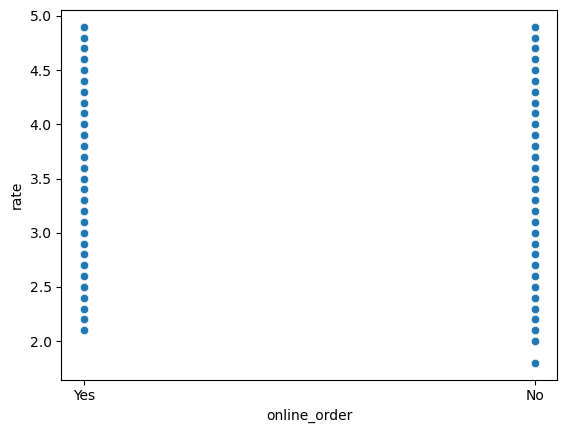

In [31]:
sns.scatterplot(x='online_order',y='rate',data=Zomato_dataset)

<AxesSubplot:xlabel='online_order', ylabel='Count'>

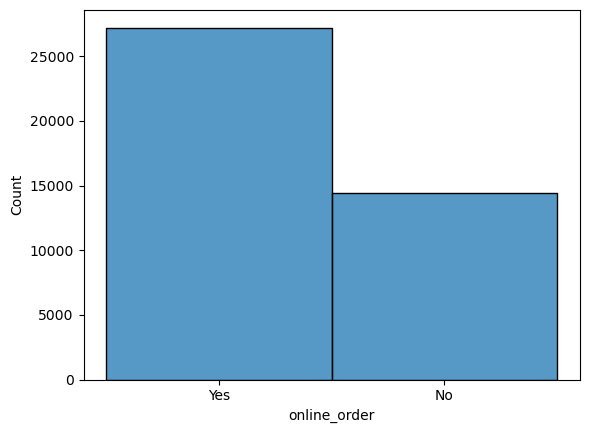

In [32]:
sns.histplot(x='online_order',data=Zomato_dataset,)

Resturant having Online order doesnot get rating below 2 but The resturant which doesnot have Online order facility have rating below 2

Around 26000 resturant have online Order facility and Around 14000 Resturant does not have Online order facility

# rate vs Book_table

<AxesSubplot:xlabel='book_table', ylabel='rate'>

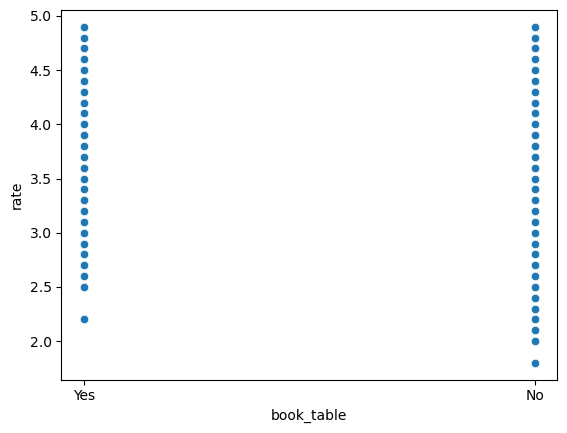

In [33]:
sns.scatterplot(x='book_table',y='rate',data=Zomato_dataset)

<AxesSubplot:xlabel='book_table', ylabel='Count'>

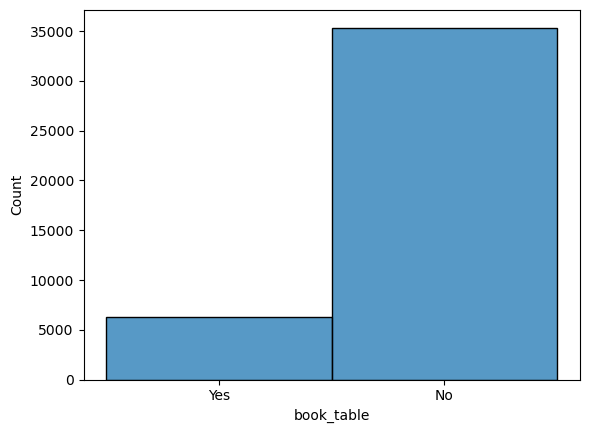

In [34]:
sns.histplot(x='book_table',data=Zomato_dataset)

Resturant having Online order doesnot get rating below 2.5 but The resturant which doesnot have Online order facility have rating below 2.5

Around 6000 resturant have online Order facility and Around 35000 Resturant does not have Online order facility

# Number of Resturant in the City

Text(0.5, 1.0, 'NO. of restaurants in a city')

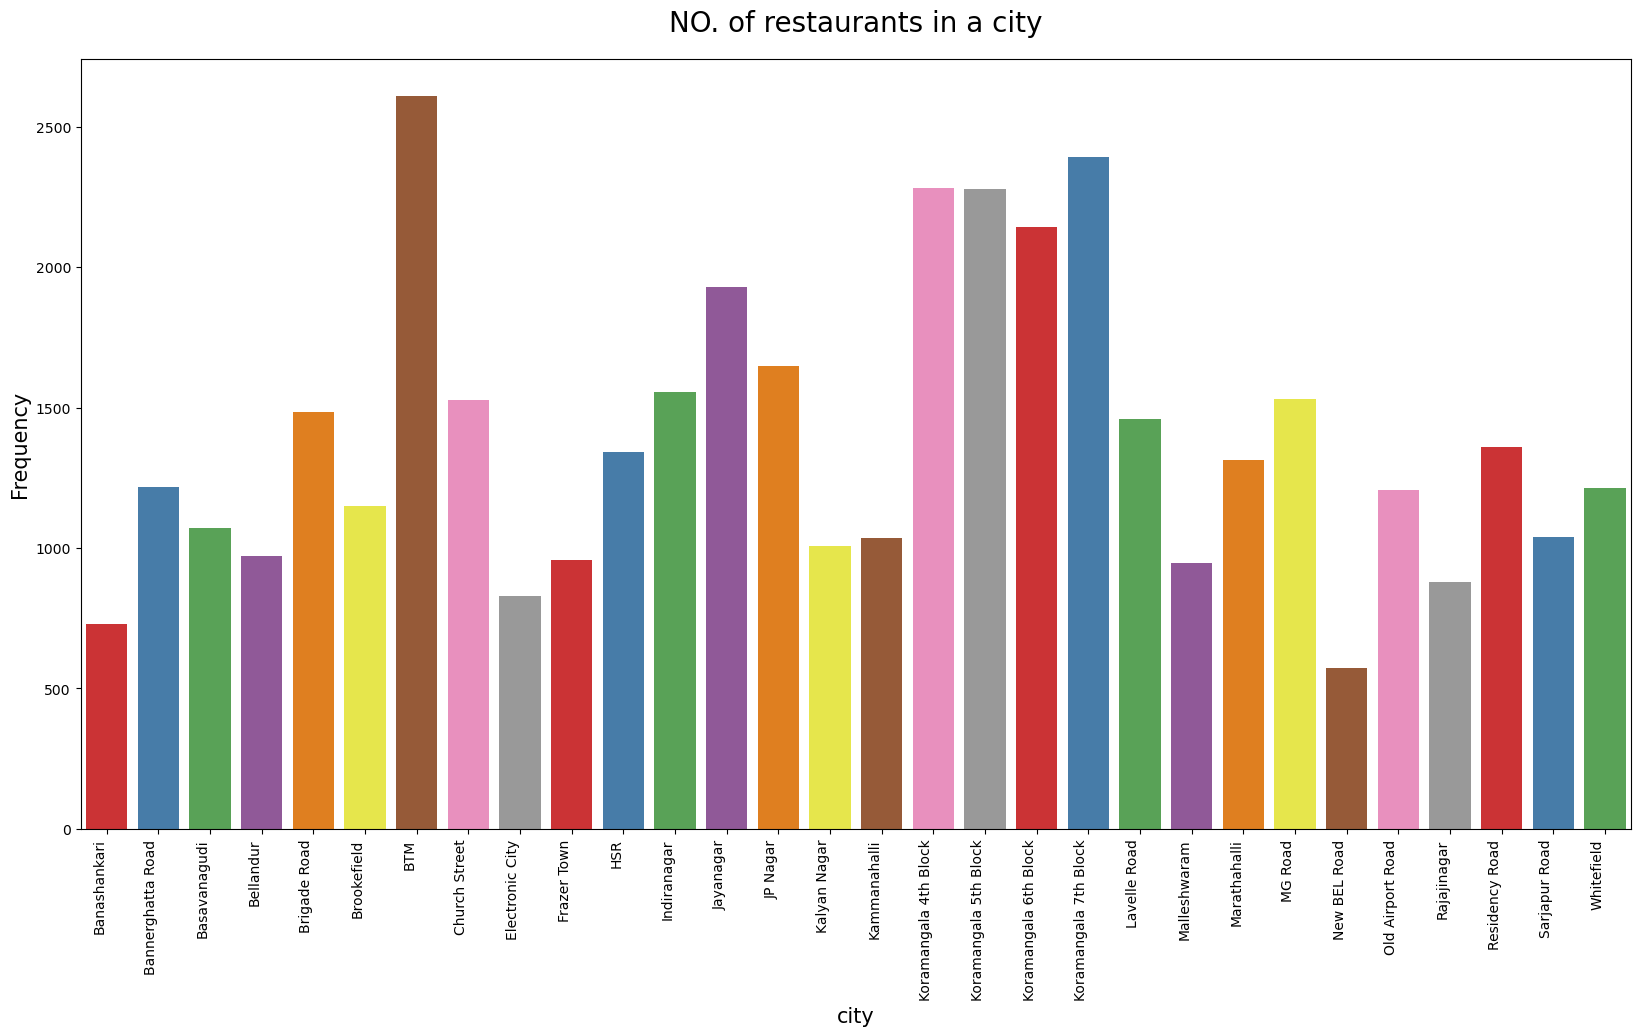

In [35]:
fig = plt.figure(figsize=(20,10))
loc = sns.countplot(x="city",data=Zomato_dataset, palette = "Set1")
loc.set_xticklabels(loc.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("city",size=15)
loc
plt.title('NO. of restaurants in a city',size = 20,pad=20)

# Top 20 famouse Resturants

Text(0.5, 0, 'Number of outlets')

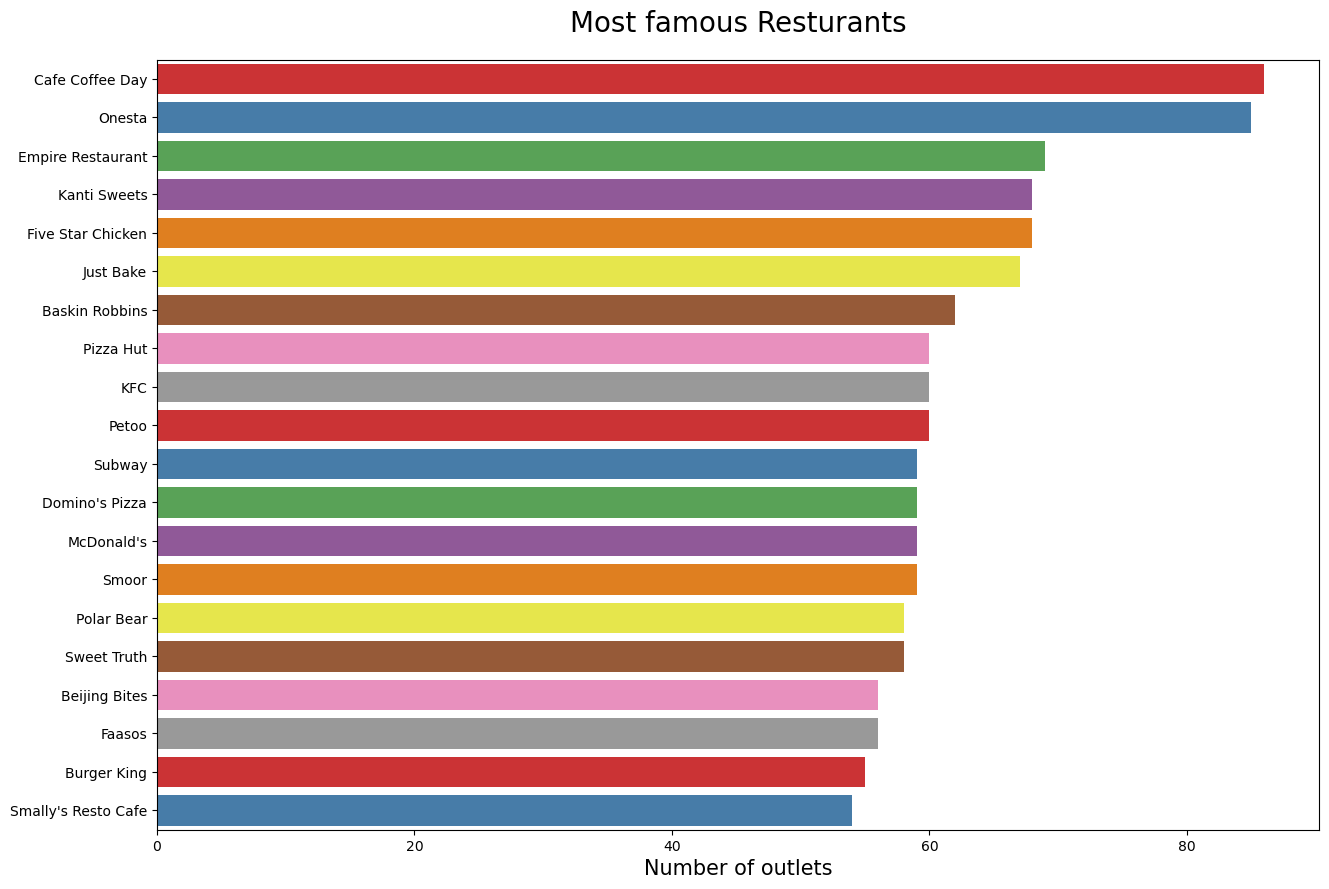

In [36]:
plt.figure(figsize=(15,10))
Resturant_Name=Zomato_dataset['name'].value_counts()[:20]
sns.barplot(x=Resturant_Name,y=Resturant_Name.index,palette='Set1')
plt.title("Most famous Resturants",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)

# Percentage of Type Of Resturants

Text(0.5, 1.0, 'Percentage of Restaurants according to their type')

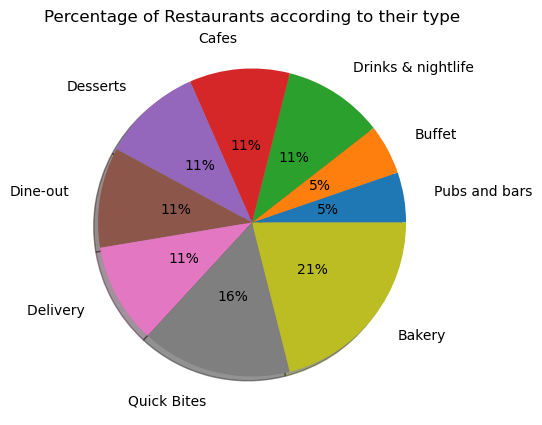

In [37]:
plt.figure(figsize=(5,5))
restaurantTypeCount=Zomato_dataset['rest_type'].value_counts().sort_values(ascending=True)
slices=[restaurantTypeCount[0],
        restaurantTypeCount[1],
        restaurantTypeCount[2],
        restaurantTypeCount[3],
        restaurantTypeCount[4],
        restaurantTypeCount[5],
        restaurantTypeCount[6],
        restaurantTypeCount[7],
        restaurantTypeCount[8]]
labels=['Pubs and bars','Buffet','Drinks & nightlife','Cafes','Desserts','Dine-out','Delivery ','Quick Bites','Bakery']
plt.pie(slices, labels=labels, autopct='%1.0f%%', pctdistance=.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Restaurants according to their type")

# Approx cost for 2 people 

<AxesSubplot:xlabel='approx_cost_for_2_People', ylabel='Density'>

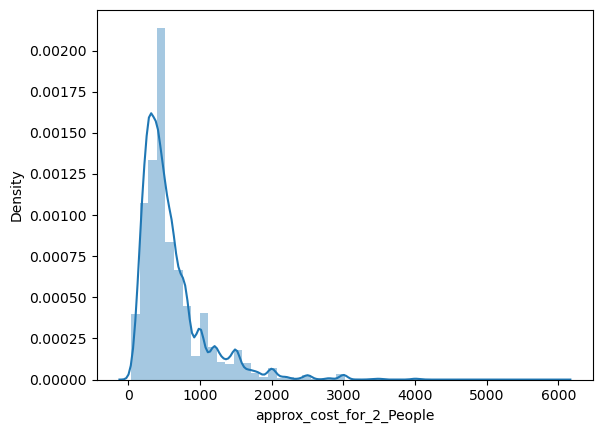

In [38]:
sns.distplot(Zomato_dataset['approx_cost_for_2_People'])

Most of the Resturant have apporox_cost_for_2_people arround 600

# Resturant rating Distribution

<AxesSubplot:xlabel='rate', ylabel='Density'>

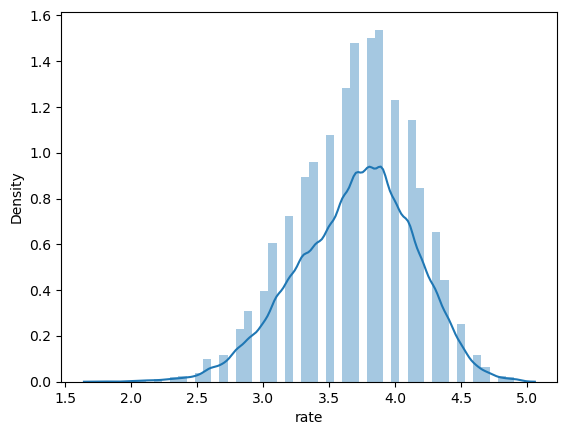

In [39]:
sns.distplot(Zomato_dataset['rate'])

In [40]:
Zomato_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41665 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      41665 non-null  object 
 1   online_order              41665 non-null  object 
 2   book_table                41665 non-null  object 
 3   rate                      41665 non-null  float64
 4   votes                     41665 non-null  int64  
 5   rest_type                 41665 non-null  object 
 6   cuisines                  41665 non-null  object 
 7   approx_cost_for_2_People  41665 non-null  float64
 8   Resturant_type            41665 non-null  object 
 9   city                      41665 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 3.5+ MB


# Convert the categorical data to the numerical data

In [41]:
from sklearn.preprocessing import LabelEncoder
lable=LabelEncoder()
New_df=Zomato_dataset.copy()
New_df.head()

,name,online_order,book_table,rate,votes,rest_type,cuisines,approx_cost_for_2_People,Resturant_type,city
0,Jalsa,Yes,Yes,4.1,775,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari


In [42]:
list1=['online_order','book_table','rest_type','cuisines','city','Resturant_type']
for i in list1:
    New_df[i]=lable.fit_transform(New_df[i])

New_df.head()

,name,online_order,book_table,rate,votes,rest_type,cuisines,approx_cost_for_2_People,Resturant_type,city
0,Jalsa,1,1,4.1,775,24,1909,800.0,0,1
1,Spice Elephant,1,0,4.1,787,24,820,800.0,0,1
2,San Churro Cafe,1,0,3.8,918,19,657,800.0,0,1
3,Addhuri Udupi Bhojana,0,0,3.7,88,74,2237,300.0,0,1
4,Grand Village,0,0,3.8,166,24,1936,600.0,0,1


<AxesSubplot:>

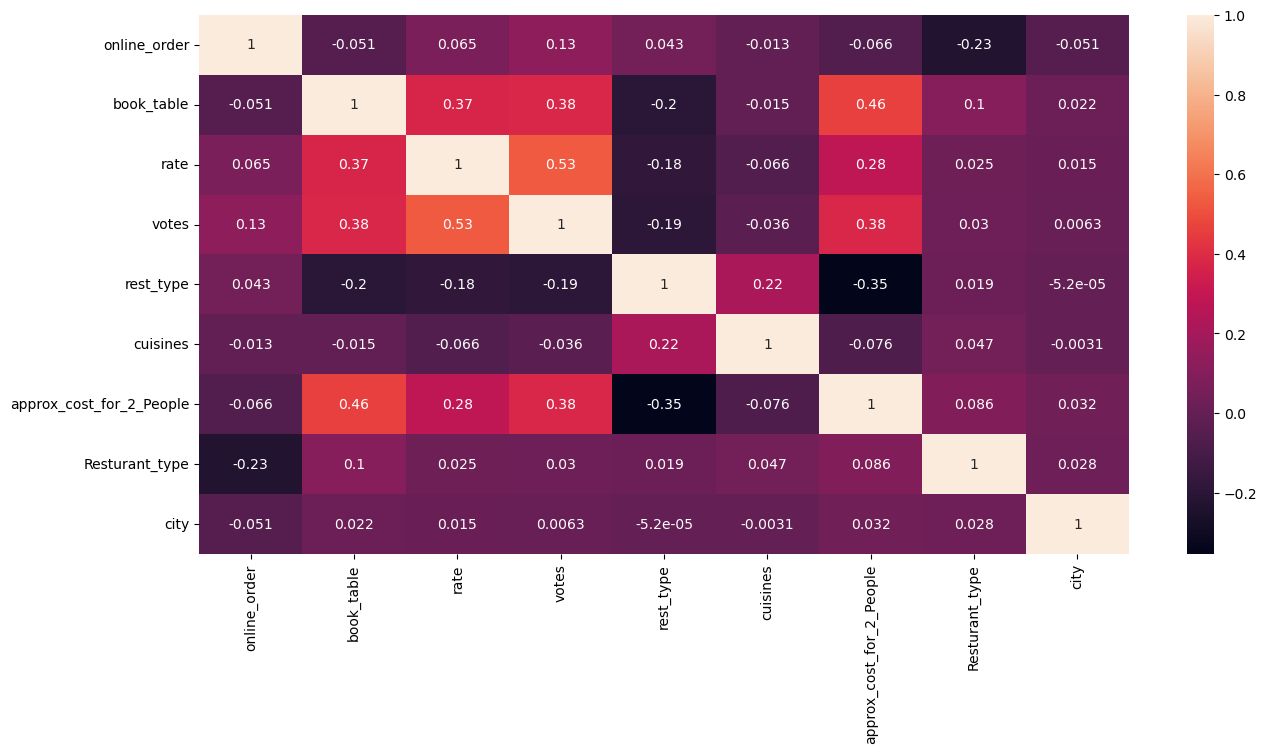

In [43]:
corr = New_df.corr(method='kendall')
plt.figure(figsize=(15,7))
sns.heatmap(corr, annot=True)

# feature scalling

In [44]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [45]:
New_df=New_df.drop(['name','rate','rest_type'],axis=1)

In [46]:
x=StandardScaler().fit(New_df).transform(New_df)
y=Zomato_dataset['rate'].values
x,y

(array([[ 0.72901553,  2.36839517,  0.48009934, ...,  0.42495852,
         -2.39814187, -1.60357219],
        [ 0.72901553, -0.42222684,  0.49370802, ...,  0.42495852,
         -2.39814187, -1.60357219],
        [ 0.72901553, -0.42222684,  0.64226941, ...,  0.42495852,
         -2.39814187, -1.60357219],
        ...,
        [-1.37171288, -0.42222684, -0.36817482, ...,  1.93702078,
          2.72724594,  1.77887298],
        [-1.37171288,  2.36839517, -0.13115704, ...,  4.09710972,
          2.72724594,  1.77887298],
        [-1.37171288, -0.42222684, -0.38405161, ...,  1.93702078,
          2.72724594,  1.77887298]]),
 array([4.1, 4.1, 3.8, ..., 3.6, 4.3, 3.4]))

# split the data set into train and test data

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=40)

In [48]:
X_train,y_train

(array([[-1.37171288,  2.36839517, -0.24456268, ...,  1.28899409,
          1.01878333,  1.53726975],
        [-1.37171288, -0.42222684, -0.3454937 , ..., -0.87109485,
          1.01878333, -1.72437381],
        [ 0.72901553, -0.42222684, -0.39199001, ..., -0.87109485,
         -0.68967927,  0.32925362],
        ...,
        [-1.37171288, -0.42222684, -0.32054446, ...,  0.20894962,
         -0.68967927, -0.39555606],
        [-1.37171288,  2.36839517, -0.21961344, ...,  1.0729852 ,
         -0.68967927,  0.69165846],
        [ 0.72901553,  2.36839517,  0.13988243, ...,  2.36903857,
         -2.39814187, -0.63715929]]),
 array([4.4, 3.8, 3.2, ..., 3.7, 3.9, 4.2]))

# 1. Linear Rigression

In [49]:
from sklearn.linear_model import LinearRegression
Lin_reg=LinearRegression()

# Train The Model

In [50]:
Lin_reg.fit(X_train,y_train)

LinearRegression()

# Model score on Train and test Data

In [51]:
print('Score of Train data ',Lin_reg.score(X_train,y_train))
print('Score of Test data ',Lin_reg.score(X_test,y_test))

Score of Train data  0.2923805882917603
Score of Test data  0.2906953558539177


In [52]:
Lr_predict=Lin_reg.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,Lr_predict)

0.2906953558539177

# Applying linear Regression ,Accuracy 30%

# 2.Dicision Tree

In [53]:
from sklearn.tree import DecisionTreeRegressor
Deci_Tree_Reg=DecisionTreeRegressor(min_samples_leaf=.0001)

# Train The model

In [54]:
Deci_Tree_Reg.fit(X_train,y_train)

DecisionTreeRegressor(min_samples_leaf=0.0001)

# Model score on Train and test Data

In [55]:
print('Score of Train data ',Deci_Tree_Reg.score(X_train,y_train))
print('Score of Test data ',Deci_Tree_Reg.score(X_test,y_test))

Score of Train data  0.9247354546929972
Score of Test data  0.8107066926686101


In [56]:
Dt_predict=Deci_Tree_Reg.predict(X_test)
r2_score(y_test,Dt_predict)

0.8107066926686101

# Applying Decision tree regression ,Accuracy 80%

# 3.Random Forest

In [57]:
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor()

# Train the Model

In [58]:
rf_reg.fit(X_train,y_train)

RandomForestRegressor()

# Model score on Train and test Data

In [59]:
print('Score of Train data ',rf_reg.score(X_train,y_train))
print('Score of Test data ',rf_reg.score(X_test,y_test))

Score of Train data  0.9857864626920734
Score of Test data  0.9023476383866154


In [60]:
rf_predict=rf_reg.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,rf_predict)

0.9023476383866154

# Applying Random Forest regression ,Accuracy 90%

# As you can see from above data "Random Forest Regressor" Given the highest Accuacry score


# Predict Rating With Random Forest Regressor

In [61]:
rf_reg.predict([[1,1,500,1200,350,3,3]])

array([4.582])

Giving accuracy 4.5

# Compare Actual rating with Random Forest regressior Rating

In [62]:
Comare_df=pd.DataFrame({'Actual_Rating':y_test,
                        'Predicted_rating':np.round(rf_predict,2)})
Comare_df

,Actual_Rating,Predicted_rating
0,4.0,3.81
1,3.6,3.47
2,3.0,3.21
3,3.7,3.70
4,4.2,4.20
...,...,...
4162,3.5,3.50
4163,3.6,3.61
4164,3.3,3.34
4165,4.1,4.15


# Conclusion:

1.Three model has been trained namely, Linear Regression,Decision Tree,Random Forest Respectively.

2.Based on the analysis the best model for prediction is Random Forest Model.

3.90% accurecy found in Random Forest Model.

# Save the Model

In [63]:
import pickle
with open('resturant_rating_predictor.pkl', 'wb') as file:
    pickle.dump(rf_reg, file)